In [3]:
%load_ext watermark
%watermark -a 'Yu Sang Jeong' -u -d -p numpy,pandas,matplotlib,seaborn,sklearn


Yu Sang Jeong 
last updated: 2020-03-25 

numpy 1.18.2
pandas 1.0.3
matplotlib 3.2.0
seaborn 0.10.0
sklearn 0.22.2.post1


In [4]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
import pandas as pd
df = pd.DataFrame(california.data, columns=california.feature_names)
df_target = pd.DataFrame(california.target, columns=["Target"])
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
import numpy as np

In [7]:
df_target.tail()
    

,Target
20635,0.781
20636,0.771
20637,0.923
20638,0.847
20639,0.894


In [8]:

bins = [0.2, 1.7, 2.5, 5]
labels = ["level_1", "level_2", "level_3"]


def make_onehot(df, target, bins, labels):
    
    target['Target'] = target[(target.Target >= 0.2)&(target.Target <= 5)]
    #원하는 조건의 target data만 추출
    
    target['Target'] = pd.cut(target['Target'].values,bins,labels = labels)
    #cut 함수를 이용하여 Target Coloum의 값들을 categorical 변수로 변경   
    
    df["Target"] = target['Target']
    #전체 california DataFrame에 범위안의 target column 추가
    
    
    df = df.dropna(subset=['Target']).copy()
    #Target Column의 결측값이 존재하는 행을 제거한다.
    #copy() 쓰는 이유는 DataFrame의 값을 변경할때,
    #그냥 대입할 경우에는 SettingWithCopy Warning 오류가 발생한다.
    
    df_dummy = pd.get_dummies(df['Target'])  
    #pd.get_dummies 함수 활용하여 가변수 생성  
    #one-hot-encoding 성공
    
    del df['Target'] 
    #Target column 제거 
    
    df["level_1"] = df_dummy["level_1"]  #전체 DataFlame에 생성한 one-hot-encoding columns 추가해준다
    df["level_2"] = df_dummy["level_2"]
    df["level_3"] = df_dummy["level_3"]
    output = df
    
    return output

In [9]:
data = make_onehot(df, target = df_target, bins= bins, labels=labels)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,level_1,level_2,level_3
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0,0,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0,0,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0,0,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0,0,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,1,0,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,1,0,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,1,0,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,1,0,0


In [10]:
import matplotlib.pyplot as plt

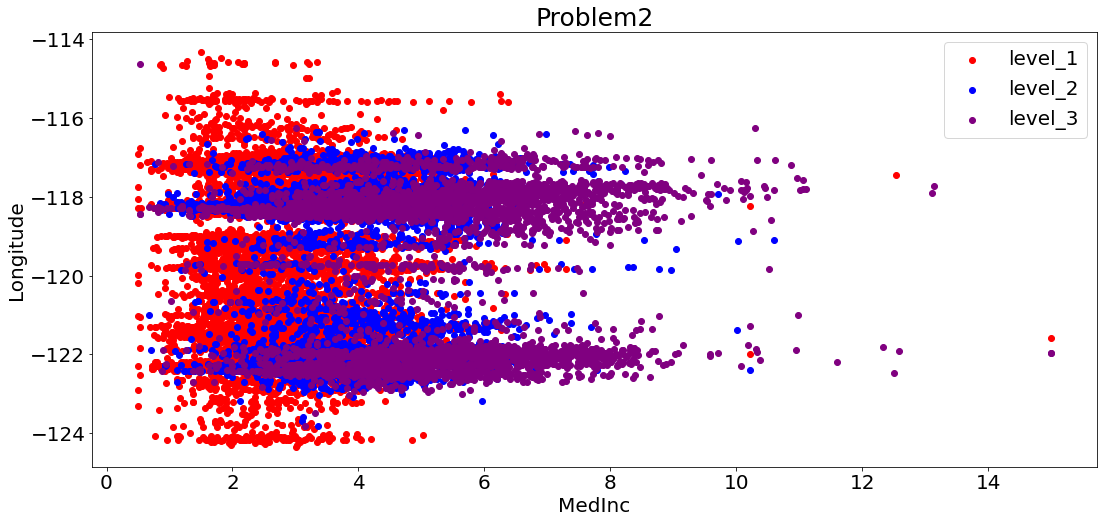

In [11]:

plt.figure(figsize=(18, 8))        #전체 크기 결정
plt.rcParams['font.size'] = 20     #x,y축의 글씨 크기 조절


x1 = data[data.level_1 == 1] #level_1가 1 인 데이터 그룹
x2 = data[data.level_2 == 1] #level_2가 1 인 데이터 그룹 
x3 = data[data.level_3 == 1] #level_3가 1 인 데이터 그룹

#각 그룹 별로 scatter를 그래프 위에 나타낸다. (x축 : MedInc , y축 : Longitude)
x1_legend = plt.scatter(x1['MedInc'],x1['Longitude'], c = 'red')
x2_legend = plt.scatter(x2['MedInc'],x2['Longitude'], c = 'blue')
x3_legend = plt.scatter(x3['MedInc'],x3['Longitude'], c = 'purple')
#각각을 legend에서 handling하기 위해서 변수에 담아준다.


#legend를 만든다. 
plt.legend(handles = (x1_legend,x2_legend,x3_legend),labels = ('level_1','level_2','level_3'), loc = 'upper right', fontsize= 20) 

#그래프의 제목 설정
plt.title("Problem2", fontsize=25)

#x축 이름 설정
plt.xlabel("MedInc", fontsize=20)

#y축 이름 설정
plt.ylabel("Longitude", fontsize=20)

plt.show()

In [12]:
from sklearn.datasets import make_blobs

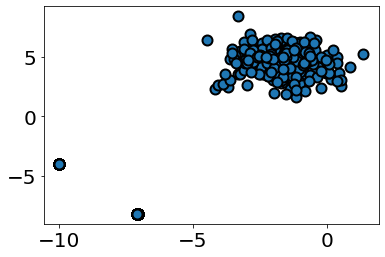

In [84]:
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=1, cluster_std = 0.001)
X2, _ = make_blobs(n_samples=300, n_features=2, centers=1, random_state=1, cluster_std = 1)

X = np.vstack([X, X2])

plt.scatter(X[:, 0], X[:, 1], marker='o', s=100,
            edgecolor="k", linewidth=2)
plt.show()


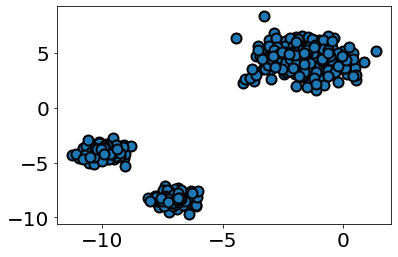

In [85]:
np.random.seed(0) #랜덤 함수 호출 

x_random_list = np.random.normal(0, 0.5, size=300) #(평균 : 0,표준편차 : 0.5)인 정규분포로부터 sample 300개를 뽑는다.
y_random_list = np.random.normal(0, 0.5, size=300) #Y값도 마찬가지


for idx in range(300):                  #X는 2차원 배열이므로 각 점들을 임의로 바꾸어 준다. 
                                        #X의 index 0~299 까지는 jittering 안된 부분 
    X[idx][0] += x_random_list[idx]    #X[idx][0] : x [idx][1] : y
    X[idx][1] += y_random_list[idx]    #표쥰편차 랜덤값에다가 x,y를 더해서 좌표를 조정해준다. 각 sample마다.  

plt.scatter(X[:, 0], X[:, 1], marker='o', s=100, edgecolor="k", linewidth=2)
plt.show()